## Analyzing text - Corpus Linguistics
This is going to be my notebook for the second week assignment. I want to first download the King James version of Bible from the Gutenberg corpus and convert it into a readable dataframe.

### Data acquisition
First we import the necessary packages.

In [8]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls
import docx

import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

Now to import the raw file from the Gutenberg Corpora and see what it looks like.

In [9]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.corpus.gutenberg.raw('bible-kjv.txt')[2000:4000]

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/arvindilamaran/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arvindilamaran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arvindilamaran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'er light to rule the night: he made the stars also.\n\n1:17 And God set them in the firmament of the heaven to give light\nupon the earth, 1:18 And to rule over the day and over the night, and\nto divide the light from the darkness: and God saw that it was good.\n\n1:19 And the evening and the morning were the fourth day.\n\n1:20 And God said, Let the waters bring forth abundantly the moving\ncreature that hath life, and fowl that may fly above the earth in the\nopen firmament of heaven.\n\n1:21 And God created great whales, and every living creature that\nmoveth, which the waters brought forth abundantly, after their kind,\nand every winged fowl after his kind: and God saw that it was good.\n\n1:22 And God blessed them, saying, Be fruitful, and multiply, and fill\nthe waters in the seas, and let fowl multiply in the earth.\n\n1:23 And the evening and the morning were the fifth day.\n\n1:24 And God said, Let the earth bring forth the living creature after\nhis kind, cattle, and creepi

All the listed works have been nicely marked up and classified for us so we can do much better than just looking at raw text.

In [10]:
print(nltk.corpus.gutenberg.words('bible-kjv.txt'))
print(nltk.corpus.gutenberg.sents('bible-kjv.txt'))

['[', 'The', 'King', 'James', 'Bible', ']', 'The', ...]
[['[', 'The', 'King', 'James', 'Bible', ']'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ...]


## Counting words

In [11]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(nltk.corpus.gutenberg.words('bible-kjv.txt'))
countedWords[:10]

,count,word
0,1,[
1,64023,the
2,2543,king
3,46,james
4,3,bible
5,1,]
6,381,old
7,16,testament
8,34670,of
9,445,first


In [12]:
words = [word.lower() for word in nltk.corpus.gutenberg.words('bible-kjv.txt')]
freq = nltk.FreqDist(words)
print (freq['war'])

225


As you can see the previous code counted the number of instances the word 'war' was found in the Bible (KJV). Now let us sort and plot our counts to investigate the shape of our word frequency distribution.

First we need to sort the words by count.

In [13]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,count,word
28,70509,","
1,64023,the
21,51696,and
12,43766,:
8,34670,of
23,26160,.
104,13580,to
46,12912,that
16,12667,in
53,10419,he


As you can see there are a lot of frequently used articles and other punctuations which need to be removed for better analysis. We may remove these 'function words' by removing according to a stopword list, setting some frequency threshold, or using a weighting scheme (like tf.idf) to decrease their influence (all modeled later in this tutorial).



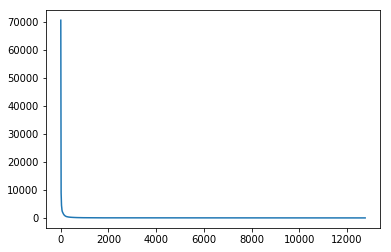

In [14]:

#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

This shows that likelihood of a word occurring is inversely proportional to its rank. This effect is called Zipf's Law, and suggests that the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency) resulting in a linear relationship.

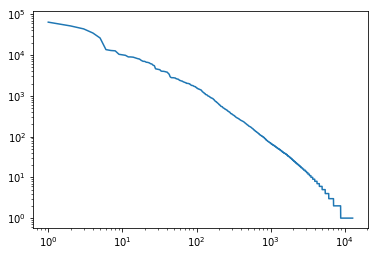

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

### Properties to be explored

First lets look surrounding words with the concordance. To do this we need to load the text into a ConcordanceIndex

In [16]:
bibleIndex = nltk.text.ConcordanceIndex(nltk.corpus.gutenberg.words('bible-kjv.txt'))

Then we can retrieve all the words that cooccur with a word in a given word window. Let's first look at `'jesus'`.

In [17]:
bibleIndex.print_concordance('jesus')

No matches


"No matches"?! We are talking about the Bible and no match for Jesus is preposterous. What if we capitalize and instead search for `'Jesus'`

In [18]:
bibleIndex.print_concordance('Jesus')

Displaying 25 of 977 matches:
 : 1 The book of the generation of Jesus Christ , the son of David , the so
husband of Mary , of whom was born Jesus , who is called Christ . 1 : 17 So
erations . 1 : 18 Now the birth of Jesus Christ was on this wise : When as 
ed his name JESUS . 2 : 1 Now when Jesus was born in Bethlehem of Judaea in
enchable fire . 3 : 13 Then cometh Jesus from Galilee to Jordan unto John ,
and comest thou to me ? 3 : 15 And Jesus answering said unto him , Suffer i
 Then he suffered him . 3 : 16 And Jesus , when he was baptized , went up s
I am well pleased . 4 : 1 Then was Jesus led up of the spirit into the wild
h thy foot against a stone . 4 : 7 Jesus said unto him , It is written agai
and worship me . 4 : 10 Then saith Jesus unto him , Get thee hence , Satan 
istered unto him . 4 : 12 Now when Jesus had heard that John was cast into 
 sprung up . 4 : 17 From that time Jesus began to preach , and to say , Rep
 of heaven is at hand . 4 : 18 And Jesus , walking by the 

Now it makes sense. Let us look at some less frequent words

In [19]:
print(countedWords[countedWords['word'] == 'magdalene'])
bibleIndex.print_concordance('Magdalene')

       count       word
11139     12  magdalene
Displaying 12 of 12 matches:
m : 27 : 56 Among which was Mary Magdalene , and Mary the mother of James a
ted . 27 : 61 And there was Mary Magdalene , and the other Mary , sitting o
irst day of the week , came Mary Magdalene and the other Mary to see the se
n afar off : among whom was Mary Magdalene , and Mary the mother of James t
the sepulchre . 15 : 47 And Mary Magdalene and Mary the mother of Joses beh
when the sabbath was past , Mary Magdalene , and Mary the mother of James ,
week , he appeared first to Mary Magdalene , out of whom he had cast seven 
ts and infirmities , Mary called Magdalene , out of whom went seven devils 
l the rest . 24 : 10 It was Mary Magdalene and Joanna , and Mary the mother
 the wife of Cleophas , and Mary Magdalene . 19 : 26 When Jesus therefore s
irst day of the week cometh Mary Magdalene early , when it was yet dark , u
od , and your God . 20 : 18 Mary Magdalene came and told the disciples that


### Raw text analysis

In [20]:
def downloadIfNeeded(targetURL, outputFile, **openkwargs):
    if not os.path.isfile(outputFile):
        outputDir = os.path.dirname(outputFile)
        #This function is a more general os.mkdir()
        if len(outputDir) > 0:
            os.makedirs(outputDir, exist_ok = True)
        r = requests.get(targetURL, stream=True)
        #Using a closure like this is generally better than having to
        #remember to close the file. There are ways to make this function
        #work as a closure too
        with open(outputFile, 'wb') as f:
            f.write(r.content)
    return open(outputFile, **openkwargs)

Now we open the raw word document of the English translation of Bhagavad Gita (Hindu religious text).

In [21]:
example_docx = 'http://www.ardjoena.nl/Advaita/Media/Bhagavad-Gita.doc'
example_docx_save = 'bhagavad-gita.docx'
d = docx.Document(downloadIfNeeded(example_docx, example_docx_save, mode = 'rb'))
string = ""
for paragraph in d.paragraphs:
    string = string + " " + paragraph.text
    print(paragraph.text)

Bhagavad Gita 

translated by Ramanand Prasad


Let noble thoughts come to us from everywhere – The Vedas 


INTRODUCTION
The Gita is a doctrine of universal truth. Its message is universal, sublime, and non-sectarian al-though it is a part of the scriptural trinity of Sanaatana Dharma, commonly known as Hinduism. The Gita is very easy to understand in any language for a mature mind. A repeated reading with faith will reveal all the sublime ideas contained in it. A few abstruse statements are interspersed here and there but they have no direct bearing on practical issues or the central theme of Gita. The Gita deals with the most sacred metaphysical science. It imparts the knowledge of the Self and answers two universal questions: Who am I, and how can I lead a happy and peaceful life in this world of dualities. It is a book of yoga, the moral and spiritual growth, for mankind based on the cardinal principles of Hindu religion.
The message of Gita came to humanity because of Arjuna’s un

Lord Krishna said: The path of Self-knowledge and the path of selfless service both lead to the supreme goal. But, of the two, the path of selfless service is superior to path of Self-knowledge, because it is easier to practice. 
A person should be considered a true renunciant who has neither attachment nor aversion for any-thing. One is easily liberated from Karmic bondage by becoming free from attachment and aver-sion. 

BOTH PATHS LEAD TO SUPREME 
The ignorant — not the wise — consider the path of Self-knowledge and the path of selfless ser-vice (Karma-yoga) as different from each other. The person, who has truly mastered one, gets the benefits of both. 
Whatever goal a renunciant reaches, a Karma-yogi also reaches the same goal. Therefore, the one who sees the path of renunciation and the path of unselfish work as the same really sees. 
But, true renunciation, O Arjuna, is difficult to attain without Karma-yoga. A sage equipped with Karma-yoga quickly attains Nirvana. 
A Karma-yogi

In [22]:
string[:100]

' Bhagavad Gita   translated by Ramanand Prasad   Let noble thoughts come to us from everywhere – The'

In [23]:
bgTokens = nltk.word_tokenize(string)

bgText = nltk.Text(bgTokens)

bgIndex = nltk.text.ConcordanceIndex(bgText) 
bgIndex.print_concordance('Krishna')

Displaying 25 of 86 matches:
course between the Supreme Lord , Krishna , and His devotee-friend , Arjuna
ic , Mahaabhaarata . In Gita Lord Krishna advises Arjuna to get up and figh
out a war . All mediation by Lord Krishna and others failed . The big war o
 Gita is a discourse between Lord Krishna and the confused Arjuna on the ba
ered to the grea-test guru , Lord Krishna , with love and devotion . May th
un after all negotiations by Lord Krishna and others to avoid it failed . T
as tremendous . After that , Lord Krishna and Arjuna , seated in a grand ch
 , blew their celestial conches . Krishna blew His conch first , and then A
bow and spoke these words to Lord Krishna : O Lord , please stop my chariot
le . Sanjaya said : O King ; Lord Krishna , as requested by Arjuna , placed
am unable to stand steady , and O Krishna , I see bad omens . I see no use 
ry , nor pleasure nor kingdom , O Krishna . What is the use of the kingdom 
, or enjoyment , or even life , O Krishna ? Because all tho

Now that we have gotten this loaded, let's glance at few features we will delve into more deeply later.

For example, we can find words that statistically tend to occur together and typically have a composite, idiomatic meaning irreducible to the semantics of its component words. We will do this later with more control over exactly how these are identified.

In [24]:
bgText.collocations()

material Nature; Lord Krishna; selfless service; celestial
controllers; Krishna said; Supreme Abode; living entity; three modes;
THREE TYPES; sense objects; inner psyche; selfish attachment;
transcendental knowledge; entire universe; whose mind; THREE MODES;
physical body; celestial rulers; TRANSCENDENTAL KNOWLEDGE; loving
devotion


Or we can pick a word (or words) and find what words tend to occur around it.

In [25]:
bgText.common_contexts(['lord'])

supreme_, gita_krishna by_krishna between_krishna the_’ the_and
the_himself ,_krishna the_accept of_hanumana to_krishna o_, ;_krishna
o_krishna :_krishna ._krishna body_krishna the_, person_krishna
?_krishna


We can also just count the number of times the word occurs.

In [26]:
bgText.count('Krishna')

86

We can also plot each time a set of words occurs.

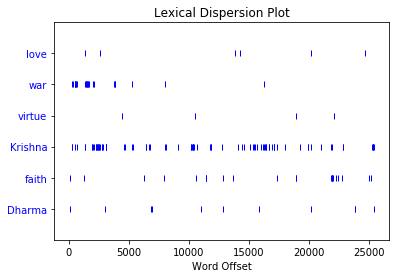

In [27]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
bgText.dispersion_plot(['love','war', 'virtue', 'Krishna' ,'faith', 'Dharma'])
sns.set() #Re-enabling seaborn

### Filtering and Normalizing text

As we want to start comparing the different releases we may choose to do a bit of filtering and normalizing that will allow us to focus on what we most care about. We can first make all of the words lower case, then drop the non-word tokens. Next, we can remove some 'stop words', stem the remaining words to remove suffixes, prefixes and (in some languages) infixes, or lemmatize tokens by intelligently grouping inflected or variant forms of the same word (e.g., with a stemmer and a dictionary).

To begin this process, we will first define a function to work over the tokenized lists, then another to add normalized tokens to a new column.

Let us first create a dataframe of the paragraphs from the text and then tokenize each paragraph for further analysis.

In [189]:
len(d.paragraphs)  
bglist = []
bg_df=pandas.DataFrame({'paragraphs' : ['']})
for paragraph in d.paragraphs:
    bglist.append(paragraph.text)
bg_df = pandas.DataFrame({'paragraphs' : bglist})
bg_df['paragraphs'].replace('', np.nan, inplace=True)
bg_df.dropna(subset=['paragraphs'], inplace=True)
bg_df = bg_df.reset_index(drop=True)
bg_df

,paragraphs
0,Bhagavad Gita
1,translated by Ramanand Prasad
2,Let noble thoughts come to us from everywhere ...
3,INTRODUCTION
4,The Gita is a doctrine of universal truth. Its...
5,The message of Gita came to humanity because o...
6,In ancient times there was a king who had two ...
7,After the death of king Paandu the Paandavs be...
8,"Arjuna’s dilemma is, in reality, the universal..."
9,The main objective of the Gita is to help peop...


Now we have all the texts in a DataFrame we can look at a few things.

First let's tokenize the texts with the same tokenizer as we used before. We will just save the tokens as a list for now; no need to convert to Texts.

In [29]:
bg_df['tokenized_text'] = bg_df['paragraphs'].apply(lambda x: nltk.word_tokenize(x))


Now let us loo 

In [30]:
print(', '.join(stopwords.words('english')))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

Nltk has a built-in list of stopwords. They are already imported in the import section. Let's first take a look at what they are.

In [31]:
countsDict = {}
for word in bg_df['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[(',', 1835),
 ('the', 1524),
 ('.', 1010),
 ('of', 883),
 ('and', 814),
 ('is', 451),
 ('to', 418),
 ('in', 329),
 ('by', 263),
 ('who', 237),
 ('I', 217),
 ('The', 201),
 ('a', 199),
 ('O', 194),
 ('are', 193),
 ('with', 188),
 (';', 176),
 ('Arjuna', 174),
 ('all', 172),
 ('one', 172)]

We can look at this and pick the cutoff, usually it is at the first noun. So we will cut all words before `'Arjuna'`.

In [32]:
#The stop list is then all words that occur before the first noun
nltk.download('wordnet')
stop_words_freq = []
for word, count in word_counts:
    if word == 'Arjuna':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arvindilamaran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'are'

Now we can create our function to normalize the tokens

In [33]:
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

bg_df['normalized_tokens'] = bg_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

bg_df['normalized_tokens_count'] = bg_df['normalized_tokens'].apply(lambda x: len(x))


The stemmer we use here is called the Porter Stemmer, there are many others, including another good one by the same person (Martin Porter) called the Snowball Stemmer or 'another stemmer' called the Lancaster Stemmer. We can also normalize our words by lemmatizing them, or matching word variants or inflected forms to a common morpheme in a dictionary like WordNet through intelligent stemming rules. (The WordNet function morphy returns the given word if it cannot be matched to a word in the dictionary).

Now that it is cleaned we start analyzing the dataset. We can start by finding frequency distributions for the dataset. Lets start looking at all the press releases together. The ConditionalFreqDist class reads in an iterable of tuples, the first element is the condition and the second the focal word. For starters, we will use word lengths as the conditions, but tags or clusters will provide more useful results.

In [34]:
#.sum() adds together the lists from each row into a single list
bgcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in bg_df['normalized_tokens'].sum()))

#print the number of words
print(bgcfdist.N())

11107


From this we can lookup the distributions of different word lengths

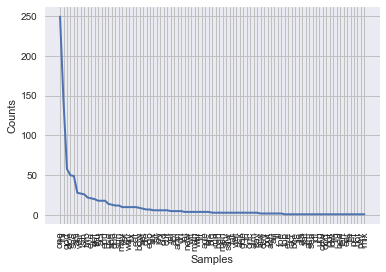

In [35]:
import matplotlib.pyplot as plt
fig=plt.figure()
bgcfdist[3].plot()
fig.savefig('test.png')   # save the figure to file
plt.close()


We can also create a Conditional Probability Distribution or ConditionalProbDist from the ConditionalFreqDist. To do this, however, we need a model for the probability distribution. A simple model is ELEProbDist which gives the expected likelihood estimate for the probability distribution of the experiment used to generate the observed frequency distribution. But my analysis works instead on using the model of MLEProbDist. So, I use the same in the following.
  

In [36]:
bgcpdist = nltk.ConditionalProbDist(bgcfdist, nltk.MLEProbDist)

#print the most common 2 letter word
print(bgcpdist[3].max())

#And its probability
print(bgcpdist[4].prob(bgcpdist[4].max()))

one
0.04178272980501393


In [37]:
bgcfdist[3].max()

'one'

Length is one feature of a word, but there are many more important features we care about. Another critical feature is a word's role in the sentence, or its part of speech (POS). Here, we will be classifying words according to their part of speech (POS), using the nltk.pos_tag(). The tags used here are those from the Brown Corpus tagset.

In [38]:
nltk.download('averaged_perceptron_tagger')
bg_df['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in bg_df['normalized_tokens']]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arvindilamaran/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


This gives us a new column with the part of speech as a short initialism and the word in a tuple, exactly how the nltk.ConditionalFreqDist() function wants them. We can now construct another conditional frequency distribution.

In [39]:
bgcfdist_WordtoPOS = nltk.ConditionalFreqDist(bg_df['normalized_tokens_POS'].sum())
list(bgcfdist_WordtoPOS.items())[:10]

[('bhagavad', FreqDist({'NN': 1})),
 ('gita', FreqDist({'JJ': 4, 'NN': 13, 'VBP': 1})),
 ('translat', FreqDist({'JJ': 3, 'NN': 1})),
 ('ramanand', FreqDist({'NN': 1})),
 ('prasad', FreqDist({'NN': 1})),
 ('let', FreqDist({'NN': 3, 'VB': 1})),
 ('nobl', FreqDist({'JJ': 4, 'NN': 1, 'PRP': 1, 'RB': 1})),
 ('thought', FreqDist({'NN': 2, 'VB': 1, 'VBD': 7, 'VBN': 4})),
 ('come', FreqDist({'JJ': 6, 'NN': 3, 'VB': 7, 'VBN': 4, 'VBP': 11})),
 ('us', FreqDist({'PRP': 6}))]

This gives the frequency of each word as each part of speech...which can be uninformative and boring.

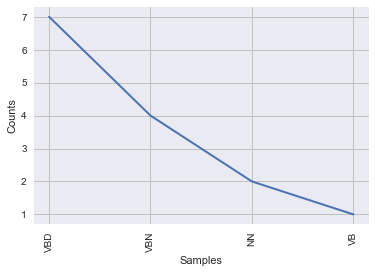

In [40]:
bgcfdist_WordtoPOS['thought'].plot()

What we want is the converse; the frequency of each part of speech for each word.

In [41]:
bgcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in bg_df['normalized_tokens_POS'].sum())

We can now identify and collect all of the superlative adjectives

In [42]:
bgcfdist_POStoWord['JJS']

FreqDist({'best': 13,
          'biggest': 3,
          'digest': 2,
          'eldest': 2,
          'forest': 1,
          'greatest': 3,
          'highest': 8,
          'lowest': 2,
          'majest': 2,
          'manifest': 20,
          'mightiest': 1,
          'oldest': 1,
          'smallest': 1})

Or look at the most common nouns

In [43]:
bgcfdist_POStoWord['NN'].most_common(5)

[('arjuna', 126), ('suprem', 112), ('mind', 109), ('lord', 100), ('thi', 94)]

Or plot the base form verbs against their number of occurrences

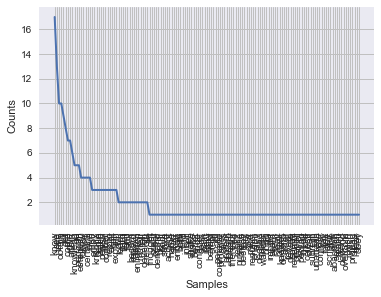

In [44]:
bgcfdist_POStoWord['VB'].plot()

We can then do a similar analysis of the word probabilities

In [45]:
bgcpdist_POStoWord = nltk.ConditionalProbDist(bgcfdist_POStoWord, nltk.MLEProbDist)

#print the most common nouns
print(bgcpdist_POStoWord['NN'].max())

#And its probability
print(bgcpdist_POStoWord['NN'].prob(bgcpdist_POStoWord['NN'].max()))

arjuna
0.019577377252952145


Now we are going to create a word cloud from the data we have analyzed.

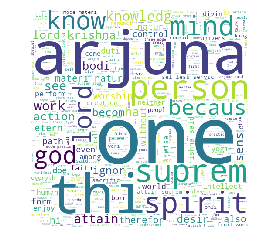

In [46]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(bg_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("bhagavadGita_word_cloud.pdf", format = 'pdf')

### Collocations

As illustrated above, we might want to find significant bigrams (two-word phrases), trigrams (three-word phrases), n-grams (n-word phrases) or skip-grams (noncontinguous 'phrases' with skip-length n). We will begin with the nltk.collocations.BigramCollocationFinder class, which can be given raw lists of strings with the from_words() method. By default it only looks at continuous bigrams but there is an option (window_size) to allow skip-grams.

In [47]:
bgBigrams = nltk.collocations.BigramCollocationFinder.from_words(bg_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(bgBigrams.N))

There are 11107 bigrams in the finder


To compare the bigrams we need to tell nltk what our score function is. Initially, we will look at the raw counts.

In [48]:
def bigramScoring(count, wordsTuple, total):
    return count

print(bgBigrams.nbest(bigramScoring, 10))

[('lord', 'krishna'), ('materi', 'natur'), ('krishna', 'said'), ('attain', 'suprem'), ('selfless', 'servic'), ('mode', 'materi'), ('fruit', 'work'), ('three', 'mode'), ('transcendent', 'knowledg'), ('suprem', 'abod')]


One note about how BigramCollocationFinder works. It doesn't use the strings internally

In [49]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

bgBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  1, The second word is: 18
The first word is:  18, The second word is: 4
The first word is:  4, The second word is: 1
The first word is:  1, The second word is: 1
The first word is:  1, The second word is: 4
The first word is:  4, The second word is: 7
The first word is:  7, The second word is: 14
The first word is:  14, The second word is: 31
The first word is:  31, The second word is: 6
The first word is:  6, The second word is: 6


The words are each given numeric IDs and there is a dictionary that maps the IDs to the words they represent. This is a common performance optimization.

Two words can appear together by chance. Recall from  Manning and Schütze's textbook that a $t-value$ can be computed for each bigram to see how significant the association is. You may also want to try computing the $\chi^2$, likelihood ratio, and pointwise mutual information statistics.

In [50]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bgBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('materi', 'natur'), 384.42006305460205),
 (('lord', 'krishna'), 350.7952065499312),
 (('selfless', 'servic'), 269.2829881065468),
 (('krishna', 'said'), 182.82002330544054),
 (('fruit', 'work'), 176.5027341973544),
 (('transcendent', 'knowledg'), 175.8803365742132),
 (('mode', 'materi'), 162.01836226659302),
 (('celesti', 'control'), 160.13991847625158),
 (('three', 'mode'), 153.50603570365843),
 (('suprem', 'abod'), 151.79317297480654),
 (('live', 'entiti'), 149.0596740928444),
 (('inner', 'psych'), 139.61695821627072),
 (('three', 'type'), 134.2446283963318),
 (('attach', 'fruit'), 130.93718110600062),
 (('attain', 'suprem'), 124.07830501237977),
 (('selfish', 'attach'), 115.01468859170606),
 (('physic', 'bodi'), 113.7914478982019),
 (('mode', 'good'), 112.91422075936711),
 (('mode', 'passion'), 110.46971399480776),
 (('individu', 'soul'), 104.84799824351357),
 (('lust', 'anger'), 99.24662613911288),
 (('sens', 'object'), 96.86614903822763),
 (('love', 'devot'), 96.64898157379787)

We can also look at trigrams

In [166]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
bgTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(bg_df['normalized_tokens'].sum())
bgTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('lord', 'krishna', 'said'), 5.290264769623971),
 (('mode', 'materi', 'natur'), 4.795077120181595),
 (('attach', 'fruit', 'work'), 3.8725667300591016),
 (('three', 'mode', 'materi'), 3.7411250218223793),
 (('attain', 'suprem', 'abod'), 2.999124552288542),
 (('selfish', 'attach', 'fruit'), 2.8282585752683893),
 (('arjuna', 'said', 'krishna'), 2.444958684749313),
 (('krishna', 'said', 'arjuna'), 2.444958684749313),
 (('sacrific', 'chariti', 'auster'), 2.235995156245709),
 (('one', 'attain', 'suprem'), 2.224369595392639),
 (('begin', 'middl', 'end'), 1.9999937989120438),
 (('thought', 'word', 'deed'), 1.999983034147592),
 (('primari', 'materi', 'natur'), 1.9999148708160581),
 (('transcend', 'three', 'mode'), 1.9998649540845104),
 (('worship', 'love', 'devot'), 1.999846796650495),
 (('sanjaya', 'said', 'king'), 1.9998438460674675),
 (('one', 'truli', 'understand'), 1.9997910962898535),
 (('good', 'passion', 'ignor'), 1.9997187867406863),
 (('ignor', 'three', 'type'), 1.9997070695215482),

Or we can also look at n-grams(for any number of n)

In [160]:
Ngrams = nltk.ngrams(bg_df['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
#print(Filtered)
type(Filtered)

dict

In [ ]:
bgTrigrams.score_ngrams(trigram_measures.student_t)[:20]

Now we would like to analyze the conditional frequency distributions of n-grams, starting with bigrams, then trigrams and finally an n-gram.

In [146]:
bg_bigrams = nltk.bigrams(bgText)
bg_cfd_bi = nltk.ConditionalFreqDist(bg_bigrams)


In [147]:
bg_cfd_bi.conditions()

['Bhagavad',
 'Gita',
 'translated',
 'by',
 'Ramanand',
 'Prasad',
 'Let',
 'noble',
 'thoughts',
 'come',
 'to',
 'us',
 'from',
 'everywhere',
 '–',
 'The',
 'Vedas',
 'INTRODUCTION',
 'is',
 'a',
 'doctrine',
 'of',
 'universal',
 'truth',
 '.',
 'Its',
 'message',
 ',',
 'sublime',
 'and',
 'non-sectarian',
 'al-though',
 'it',
 'part',
 'the',
 'scriptural',
 'trinity',
 'Sanaatana',
 'Dharma',
 'commonly',
 'known',
 'as',
 'Hinduism',
 'very',
 'easy',
 'understand',
 'in',
 'any',
 'language',
 'for',
 'mature',
 'mind',
 'A',
 'repeated',
 'reading',
 'with',
 'faith',
 'will',
 'reveal',
 'all',
 'ideas',
 'contained',
 'few',
 'abstruse',
 'statements',
 'are',
 'interspersed',
 'here',
 'there',
 'but',
 'they',
 'have',
 'no',
 'direct',
 'bearing',
 'on',
 'practical',
 'issues',
 'or',
 'central',
 'theme',
 'deals',
 'most',
 'sacred',
 'metaphysical',
 'science',
 'It',
 'imparts',
 'knowledge',
 'Self',
 'answers',
 'two',
 'questions',
 ':',
 'Who',
 'am',
 'I',
 'h

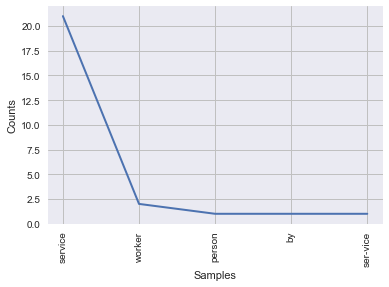

In [148]:
bg_cfd_bi['selfless'].plot()

As you can see the word 'selfless' occurs most often with the word 'service'. Bhagvad Gita is the quintessential Hindu religious text. The structure of the ancient society did rely a lot on the idea of the individual being inseperable from the collective consciousness and hence the focus on selfless service. This emphasis continues to this day where offsprings are expected to support the parents, siblings are expected to have each others back and expositionally the idea of providing hospitality to strangers as one would to their kin. 

To further illustrate this point let us look at one more conditional distribution plot.

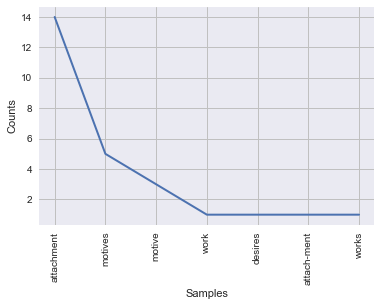

In [84]:
bg_cfd_bi['selfish'].plot()

As you can see, the word 'selfish' is mostly observed with 'attachment'. This is coherent with the previous observation that Bhagavad Gita attaches great importance to selfless service. Selfishness leads to attachment which in turn affects the propensity to serve selflessly.

Now let us analyze some tri-grams

In [129]:
bg_Trigrams = nltk.trigrams(bgText)
bg_Trigrams_pairs = ((w0, (w1, w2)) for w0, w1, w2 in bg_Trigrams)
bg_cfd_Tri = nltk.ConditionalFreqDist(bg_Trigrams_pairs)


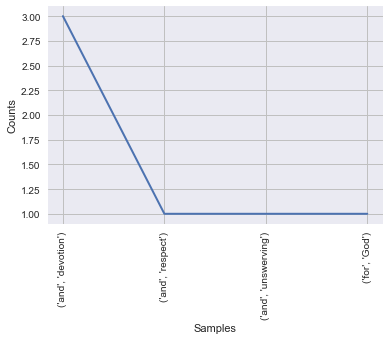

In [140]:
bg_cfd_Tri['love'].plot()

We see that 'love' and 'and devotion' occur very frequently in the text. Given that this is a religious text, we can see that love and devotion here is aimed at the God himself as portrayed in the text.

In [130]:
bg_cfd_Tri

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'Bhagavad': FreqDist({('Gita', 'translated'): 1}),
                     'Gita': FreqDist({('.', 'The'): 1,
                               ('Lord', 'Krishna'): 1,
                               ('any', 'more'): 1,
                               ('begins', 'with'): 1,
                               ('came', 'to'): 1,
                               ('deals', 'with'): 1,
                               ('is', 'a'): 2,
                               ('is', 'kept'): 1,
                               ('is', 'the'): 2,
                               ('is', 'to'): 1,
                               ('is', 'very'): 1,
                               ('translated', 'by'): 1,
                               ('with', 'faith'): 1,
                               ('’', 'amongst'): 1}),
                     'translated': FreqDist({('.', 'Language'): 1,
                               ('by', 'Ramanand'): 1}),
                     'by': FreqD

We can also look at the trigrams in another way of tupling them as shown below

In [144]:
bg_Trigrams_new = nltk.trigrams(bgText)
bg_Trigrams_pairs_new = (((w0, w1), w2) for w0, w1, w2 in bg_Trigrams_new)
bg_cfd_Tri_new = nltk.ConditionalFreqDist(bg_Trigrams_pairs_new)

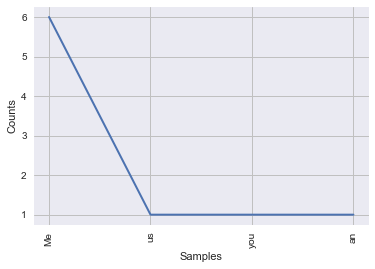

In [150]:
bg_cfd_Tri_new[('come','to')].plot()

This is perhaps the most important element of the Bhagavad Gita. The primary narrator of the text is Lord Krishna who is trying to say that he is the Almighty. Therefore, the 'Me' in the text is the lord himself. We see that the phrase 'come to' is a collocation with 'Me'. This is coherent with larger narrative of the text. In this sense it is possible that this is similar to other religious texts. It will be interesting to analyze the corpus of the major religious texts. 

In [187]:
from __future__ import division
import operator
import nltk
import numpy as np
from scipy.stats import binom
import string

def isValid(word):
  if word.startswith("#"):
    return False # no hashtag
  else:
    vword = word.translate(str.maketrans("","", string.punctuation))
    return len(vword) == len(word)

def llr(c1, c2, c12, n):
  # H0: Independence p(w1,w2) = p(w1,~w2) = c2/N
  p0 = c2 / n
  # H1: Dependence, p(w1,w2) = c12/N
  p10 = c12 / n
  # H1: p(~w1,w2) = (c2-c12)/N
  p11 = (c2 - c12) / n
  # binomial probabilities
  # H0: b(c12; c1, p0),  b(c2-c12; N-c1, p0)
  # H1: b(c12, c1, p10), b(c2-c12; N-c1, p11)
  probs = np.matrix([
    [binom(c1, p0).logpmf(c12), binom(n - c1, p0).logpmf(c2 - c12)],
    [binom(c1, p10).logpmf(c12), binom(n - c1, p11).logpmf(c2 - c12)]])
  # LLR = p(H1) / p(H0)
  return np.sum(probs[1, :]) - np.sum(probs[0, :])

def isLikelyNGram(ngram, phrases):
  if len(ngram) == 2:
    return True
  prevGram = ngram[:-1]
  return phrases.has_key(prevGram)

def main():
  # accumulate words and word frequency distributions
  lines = []
  unigramFD = nltk.FreqDist()
  fin = open("bhagavad-gita.txt",encoding="utf-8")
  i = 0
  for line in fin:
    i += 1
    words = nltk.word_tokenize(line.strip().lower())
    words = filter(lambda x: isValid(x), words)
    for x in words:
        unigramFD[x] +=1
    lines.append(words)
    if i > 1000:
      break
  fin.close()
  # identify likely phrases using a multi-pass algorithm based
  # on the LLR approach described in the Building Search Applications
  # Lucene, LingPipe and GATE book, except that we treat n-gram
  # collocations beyond 2 as n-1 gram plus a unigram.
  phrases = nltk.defaultdict(float)
  prevGramFD = None
  for i in range(2, 5):
    ngramFD = nltk.FreqDist()
    for words in lines:
      nextGrams = nltk.ngrams(words, i)
      nextGrams = filter(lambda x: isLikelyNGram(x, phrases), nextGrams)
      for x in nextGrams:
        try:
           return ngramFD.inc(x)
        except:
            return
    for k, v in ngramFD.items():
      if v > 1:
        c1 = unigramFD[k[0]] if prevGramFD == None else prevGramFD[k[:-1]]
        c2 = unigramFD[k[1]] if prevGramFD == None else unigramFD[k[len(k) - 1]]
        c12 = ngramFD[k]
        n = unigramFD.N() if prevGramFD == None else prevGramFD.N()
        phrases[k] = llr(c1, c2, c12, n)
    # only consider bigrams where LLR > 0, ie P(H1) > P(H0)
    likelyPhrases = nltk.defaultdict(float)
    likelyPhrases.update([(k, v) for (k, v)
      in phrases.items() if len(k) == i and v > 0])
    #print '==== #-grams = %d ====' % (i)
    sortedPhrases = sorted(likelyPhrases.items(),
      key=operator.itemgetter(1), reverse=True)
    for k, v in sortedPhrases:
      print (k, v)
    prevGramFD = ngramFD

if __name__ == '__main__':
  main()


/Users/arvindilamaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: DeprecationWarning: generator 'ngrams' raised StopIteration


### Distributional distances

In [194]:
vox_d = docx.Document(downloadIfNeeded(example_docx,'vox_aziz.docx', mode = 'rb'))
len(vox_d.paragraphs)  
voxlist = []
vox_df=pandas.DataFrame({'paragraphs' : ['']})
for paragraph in vox_d.paragraphs:
    voxlist.append(paragraph.text)
vox_df = pandas.DataFrame({'paragraphs' : voxlist})
vox_df['paragraphs'].replace('', np.nan, inplace=True)
vox_df.dropna(subset=['paragraphs'], inplace=True)
vox_df = vox_df.reset_index(drop=True)
vox_df

,paragraphs
0,Sexual mores in the West have changed so rapid...
1,This was my experience reading of one young w...
2,"Here’s how the story goes: A young woman, who ..."
3,"I was a teenager in the late 1970s, long past ..."
4,"When she saw Ansari at the party, she was exci..."
5,Those magazines didn’t prepare teenage girls f...
6,"Was Grace frozen, terrified, stuck? No. She te..."
7,Twenty-four hours ago—this is the speed at whi...
8,I thought it would take a little longer for th...


In [196]:
vox2_d = docx.Document(downloadIfNeeded(example_docx,'vox2_aziz.docx', mode = 'rb'))
len(vox2_d.paragraphs)  
vox2list = []
vox2_df=pandas.DataFrame({'paragraphs' : ['']})
for paragraph in vox2_d.paragraphs:
    vox2list.append(paragraph.text)
vox2_df = pandas.DataFrame({'paragraphs' : vox2list})
vox2_df['paragraphs'].replace('', np.nan, inplace=True)
vox2_df.dropna(subset=['paragraphs'], inplace=True)
vox2_df = vox2_df.reset_index(drop=True)
vox2_df

,paragraphs
0,A woman publicly known as Grace went on in Se...
1,"In an account published Saturday, Grace told ..."
2,"Later, she says he suggested they “just chill,..."
3,"In a , Ansari says that the two “ended up enga..."
4,Unlike many reports that have emerged in the w...
5,Grace’s story gets to the heart of our culture...
6,The against the supposed excesses of #MeToo h...
7,"“Together,” Flanagan continues, “the two women..."
8,"Grace’s story may tarnish Ansari’s reputation,..."
9,Despite a growing conversation around enthusia...


In [205]:
atlantic_d = docx.Document(downloadIfNeeded(example_docx,'atlantic_aziz.docx', mode = 'rb'))

len(atlantic_d.paragraphs)  
atlanticlist = []
atlantic_df=pandas.DataFrame({'paragraphs' : ['']})
for paragraph in d.paragraphs:
    atlanticlist.append(paragraph.text)
atlantic_df = pandas.DataFrame({'paragraphs' : atlanticlist})
atlantic_df['paragraphs'].replace('', np.nan, inplace=True)
atlantic_df.dropna(subset=['paragraphs'], inplace=True)
atlantic_df = atlantic_df.reset_index(drop=True)
atlantic_df

,paragraphs
0,Sexual mores in the West have changed so rapid...
1,This was my experience reading of one young w...
2,"Here’s how the story goes: A young woman, who ..."
3,"I was a teenager in the late 1970s, long past ..."
4,"When she saw Ansari at the party, she was exci..."
5,Those magazines didn’t prepare teenage girls f...
6,"Was Grace frozen, terrified, stuck? No. She te..."
7,Twenty-four hours ago—this is the speed at whi...
8,I thought it would take a little longer for th...


In [198]:
guardian_d = docx.Document(downloadIfNeeded(example_docx,'guardian_aziz.docx', mode = 'rb'))

len(d.paragraphs)  
guardianlist = []
guardian_df=pandas.DataFrame({'paragraphs' : ['']})
for paragraph in d.paragraphs:
    guardianlist.append(paragraph.text)
guardian_df = pandas.DataFrame({'paragraphs' : guardianlist})
guardian_df['paragraphs'].replace('', np.nan, inplace=True)
guardian_df.dropna(subset=['paragraphs'], inplace=True)
guardian_df = guardian_df.reset_index(drop=True)
guardian_df

,paragraphs
0,Sexual mores in the West have changed so rapid...
1,This was my experience reading of one young w...
2,"Here’s how the story goes: A young woman, who ..."
3,"I was a teenager in the late 1970s, long past ..."
4,"When she saw Ansari at the party, she was exci..."
5,Those magazines didn’t prepare teenage girls f...
6,"Was Grace frozen, terrified, stuck? No. She te..."
7,Twenty-four hours ago—this is the speed at whi...
8,I thought it would take a little longer for th...


In [200]:
vox_df['tokenized_text'] = vox_df['paragraphs'].apply(lambda x: nltk.word_tokenize(x))
vox_df['normalized_tokens'] = vox_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

In [201]:
vox2_df['tokenized_text'] = vox2_df['paragraphs'].apply(lambda x: nltk.word_tokenize(x))
vox2_df['normalized_tokens'] = vox2_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

In [206]:
atlantic_df['tokenized_text'] = atlantic_df['paragraphs'].apply(lambda x: nltk.word_tokenize(x))
atlantic_df['normalized_tokens'] = atlantic_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

In [202]:
guardian_df['tokenized_text'] = guardian_df['paragraphs'].apply(lambda x: nltk.word_tokenize(x))
guardian_df['normalized_tokens'] = guardian_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

Now we need to compare the four collection of words, remove those not found in both, and assign the remaining ones indices.

In [208]:
voxWords = set(vox_df['normalized_tokens'].sum())
vox2Words = set(vox2_df['normalized_tokens'].sum())
atlanticWords = set(atlantic_df['normalized_tokens'].sum())
guardianWords = set(guardian_df['normalized_tokens'].sum())


#Change & to | if you want to keep all words
#overlapWords = voxWords & vox2Words & atlanticWords & guardianWords
overlapWords = voxWords & vox2Words & atlanticWords & guardianWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['assault']

78

Now we can count the occurrences of each word in the corpora and create our arrays. Note that we don't have to use numpy arrays as we do here. We could just use a list, but the arrays are faster in numpy so we encourage you to get in the habit of using them.

In [210]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

voxProbArray = makeProbsArray(vox_df['normalized_tokens'], overlapWordsDict)
vox2ProbArray = makeProbsArray(vox2_df['normalized_tokens'], overlapWordsDict)
atlanticProbArray = makeProbsArray(atlantic_df['normalized_tokens'], overlapWordsDict)
guardianProbArray = makeProbsArray(guardian_df['normalized_tokens'], overlapWordsDict)

voxProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

0.99999999999999989

We can now compute the KL divergence. Pay attention to the asymmetry. Use the Jensen–Shannon divergence, which is the average KL divergence between each distribution and the average of both distributions (i.e., the midpoint), if you want symmetry.

#### Between Corpora 1 & 2

In [222]:
vox_vox2Divergence = scipy.stats.entropy(voxProbArray, vox2ProbArray)
print (vox_vox2Divergence)
vox2_voxDivergence = scipy.stats.entropy(vox2ProbArray, voxProbArray)
print (vox2_voxDivergence)
vox_vox2Divergence_ew = scipy.special.kl_div(voxProbArray, vox2ProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = vox_vox2Divergence_ew
print('\n')
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

0.304197443176
0.302021761627




,word,elementwise divergence
21,sex,0.028132
136,would,0.024780
109,young,0.020187
8,told,0.013603
27,way,0.012613
141,men,0.012476
158,account,0.012390
6,got,0.012390
112,grace,0.011070
32,kind,0.007950


#### Between Corpora 1&3

In [223]:
atlantic_guardianDivergence = scipy.stats.entropy(atlanticProbArray, guardianProbArray)
print (atlantic_guardianDivergence)
guardian_atlanticDivergence = scipy.stats.entropy(guardianProbArray, atlanticProbArray)
print (guardian_atlanticDivergence)
atlantic_guardianDivergence_ew = scipy.special.kl_div(atlanticProbArray, guardianProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = atlantic_guardianDivergence_ew
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

0.0
0.0


,word,elementwise divergence
0,apart,0.0
122,come,0.0
104,much,0.0
105,say,0.0
106,happen,0.0
107,full,0.0
108,befor,0.0
109,young,0.0
110,tell,0.0
111,also,0.0


Apart from the first two corpora, all other potential combinations give results as above where element divergence are zero for each element and hence so for the overall divergence too.

In [252]:
def extract_words(df):
    test=[]
    for index, row in df.iterrows():
        test.extend(row['tokenized_text'])
    return test

In [253]:
files = (vox_df,vox2_df,atlantic_df,guardian_df)
fileids = ('vox_df','vox2_df','atlantic_df','guardian_df')
corpora = []
for file in files:
    words = extract_words(file)
    normalized_tokens = normlizeTokens(words, stopwordLst = [], stemmer = snowball)
    corpora.append(normalized_tokens)

In [254]:
corpora

[['sexual',
  'more',
  'in',
  'the',
  'west',
  'have',
  'chang',
  'so',
  'rapid',
  'over',
  'the',
  'past',
  'year',
  'that',
  'by',
  'the',
  'time',
  'you',
  'reach',
  'intim',
  'account',
  'of',
  'commonplac',
  'sexual',
  'event',
  'of',
  'the',
  'young',
  'seem',
  'like',
  'scienc',
  'fiction',
  'you',
  'understand',
  'the',
  'vocabulari',
  'and',
  'the',
  'sentenc',
  'structur',
  'but',
  'all',
  'of',
  'the',
  'event',
  'take',
  'place',
  'in',
  'outer',
  'space',
  'you',
  're',
  'just',
  'too',
  'old',
  'this',
  'was',
  'my',
  'experi',
  'read',
  'of',
  'one',
  'young',
  'woman',
  's',
  'alleg',
  'sexual',
  'encount',
  'with',
  'aziz',
  'ansari',
  'publish',
  'by',
  'the',
  'websit',
  'babe',
  'this',
  'weekend',
  'the',
  'world',
  'in',
  'which',
  'it',
  'constitut',
  'an',
  'episod',
  'of',
  'sexual',
  'assault',
  'was',
  'so',
  'far',
  'from',
  'my',
  'own',
  'two',
  'experi',
  'of',

In [255]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    for word in corpus:
        if word in stop_words_nltk:
            s.append(word)
        else:
            nons.append(word)
    corpora_s.append(s)
    corpora_nons.append(nons)

In [256]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Now we will calculate the KL divergence for each pair of corpora, turn the results into a matrix, and visualize the matrix as a heatmap. Recall that $D_{\mathrm{KL}}(P\|Q)$ measures the amount of information loss when $Q$ is used to approximate $P$. Here, the rows are the $P$s used for calculating KL divergences, and the columns are the $Q$s. So, each cell measures the amount of information loss when the word distribution of the column text is used to approximate the word distribution of the row text. Because the KL divergence is directional, such that the divergence of $P$ from $Q$ is different from the same of $Q$ from $P$, the matrix is assymetric and contains unique information above and below the diagonal. The same is true for the $\chi^2$ divergence.

In [267]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M,column=fileids,index=fileids)
ax = sns.heatmap(div)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'column'

In [265]:
mds = sklearn.manifold.MDS(dissimilarity='precomputed')
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6),)
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

ValueError: Array must be symmetric